## DBSCAN(density-based spatial clustering of applications with noise)

输入：邻域大小epsilon和影响个数N

算法：

1.确定每个点的邻域的模
    
2.确定核心对象集合
    
3.选择一个核心对象，初始化队列{
    
     3.1不断访问队列{
         
        3.2如果其为核心对象{
            
           将其邻域中的点加入队列，
               
           从未访问过点的集合中删除其邻域中的点
       }
     }
  } 

## 产生数据

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

((1000, 2), (1000,))

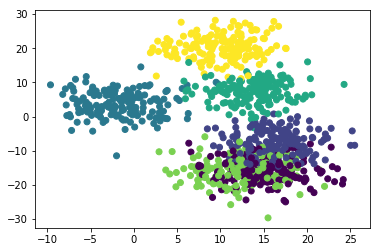

In [2]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=6, cluster_std=3.5, 
                  center_box=(-20.0, 20.0), shuffle=True, random_state=2018)
plt.scatter(X[:, 0], X[:, 1], c=y)
X.shape, y.shape

## 初始化辅助，判断邻居关系

In [3]:
def get_neighbor(x, epsilon):
    m = x.shape[0]
    neighbor = [[] for i in range(m)]
    for i in range(m):
        for j in range(i+1, m):
            if np.linalg.norm(x[i]-x[j]) <= epsilon:
                neighbor[i].append(j)
                neighbor[j].append(i)
    n = [len(x) for x in neighbor]
    return neighbor, n

## 主程序，扫描邻居

In [4]:
def dbscan(x, epsilon, n_min):
    m = x.shape[0]
      
    neighbor, n = get_neighbor(x, epsilon)                   # neighbor按顺序记录邻居的索引， n为邻居数量
    core_objects = [i for i in range(m) if n[i] >= n_min]    # 核心对象的索引
    clusters = []
    
    x_unvisited = list(range(m))
    for core_index in core_objects:
        # 密度相连
        if core_index not in x_unvisited:
            continue
        x_old = x_unvisited.copy()
        queue = [core_index]
        
        count = 0
        # 从未访问集合中删除
        x_unvisited.remove(core_index)
        count += 1
        for i in queue:
            # 如果其为核心对象，访问其邻域，其邻域中的点为同一个类
            if n[i] >= n_min:
                for nei_index in neighbor[i]:
                    if nei_index in x_unvisited:
                        # 加入访问集合
                        queue.append(nei_index)
                        # 从未访问集合中删除
                        x_unvisited.remove(nei_index)
                        count += 1
        # 此次访问中，删除掉的点，就是一个类
        cluster = list(set(x_old) - set(x_unvisited))
        assert count == len(cluster), "error"
        clusters.append(cluster)
    # 对于奇异点，任何点都无法密度可达
    count = 0
    for cluster in clusters:
        count += len(cluster)
    if(count != m):
        print("There are {} datas unvisited.".format(m-count))
    return clusters

In [5]:
clusters = dbscan(X, epsilon=3.5, n_min=35)
len(clusters)

There are 49 datas unvisited.


4

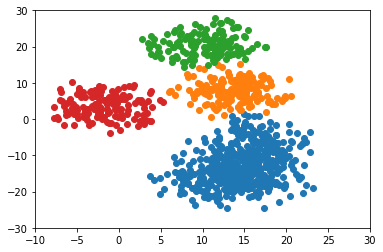

In [6]:
plt.figure()
plt.axis([-10, 30, -30, 30])
for i in range(len(clusters)):
    index = clusters[i]
    plt.scatter(X[index, 0], X[index, 1])
plt.show()

## 评价

- K-means聚类受到异常值的影响，而DBSCAN则对异常值不做聚类

- DBSCAN的聚类严重受到采样的影响(因为要判断其邻居大小)

- DBSCAN对两个相近的类，会很容聚成一个类(因为密度相连)